# U.S. Medical Insurance Costs

In [ ]:
Project Objectives:
* Work locally on your own computer
* Import a dataset into your program
* Analyze a dataset by building out functions or class methods
* Use libraries to assist in your analysis
* Optional: Document and organize your findings
* Optional: Make predictions about a dataset’s features based on your findings

Goals = Questions to answer:
- Which factors contribute (most) to charges
- What advice could you give based on these findings regarding prevention. 

Data
In this project we are working with the 'insurance.csv' file. Inspecting the insurance file shows the following headers:
age,sex,bmi,children,smoker,region,charges. 
* age = integer
* sex = male/female
* bmi = float
* children = integer
* smoker = yes/no
* region = string
* charges = float

Analysis
* EDA - min, max, mean, median for numerical values. Basic plotting to see distribution
* Crosstab for categorical values, plotting. explore distribution
* Visuals

In [3]:
# First we need to import the csv before we can perfom analysis on it.
import csv

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Create list of the data
age = []
gender = []
bmi = []
children = []
smoker = []
region = []
charges = []

with open('insurance.csv', newline='') as insurance_csv:
    insurance_reader = csv.DictReader(insurance_csv, delimiter=',')
    for row in insurance_reader:
        age.append(row['age'])
        gender.append(row['sex'])
        bmi.append(row['bmi'])
        children.append(row['children'])
        smoker.append(row['smoker'])
        region.append(row['region'])
        charges.append(row['charges'])

In [9]:
# Create a dataframe using the separate lists
header = ['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges']
insurance = pd.DataFrame(list(zip(age, gender, bmi, children, smoker, region, charges)), columns=header)

In [10]:
print(insurance.head())

  Age  Gender     BMI Children Smoker     Region      Charges
0  19  female    27.9        0    yes  southwest    16884.924
1  18    male   33.77        1     no  southeast    1725.5523
2  28    male      33        3     no  southeast     4449.462
3  33    male  22.705        0     no  northwest  21984.47061
4  32    male   28.88        0     no  northwest    3866.8552


In [11]:
# Check how many records there are
print(len(insurance))

1338


In [19]:
# Inspect datatype
#print(insurance.dtypes)

In [16]:
# Change the datatype for analysis
insurance['Age'] = pd.to_numeric(insurance['Age'])
insurance['BMI'] = pd.to_numeric(insurance['BMI'])
insurance['Children'] = pd.to_numeric(insurance['Children'])
insurance['Charges'] = pd.to_numeric(insurance['Charges'])

In [18]:
#print(insurance.dtypes)

In [130]:
# Inspect separate values: range, mean, median. 
# Function inspection returns the minimum, maximum, mean and median for column x.
# Also returns a histogram 

def inspection(x):
    len_x = len(x)
    min_x = np.min(x)
    max_x = np.max(x)
    ranges = int(max_x - min_x)
    mean_x = np.mean(x)
    median_x = np.median(x)
    print("Minimun:", min_x,
         "\nMaximum:", max_x,
         "\nMean:", mean_x,
         "\nMedian:", median_x,
         "\n")
    
    plt.hist(x, bins=ranges)
    plt.show()


Age
Minimun: 18 
Maximum: 64 
Mean: 39.20702541106129 
Median: 39.0 



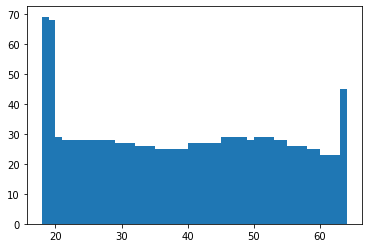

BMI
Minimun: 15.96 
Maximum: 53.13 
Mean: 30.663396860986538 
Median: 30.4 



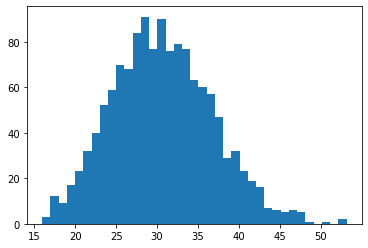

Children
Minimun: 0 
Maximum: 5 
Mean: 1.0949177877429 
Median: 1.0 



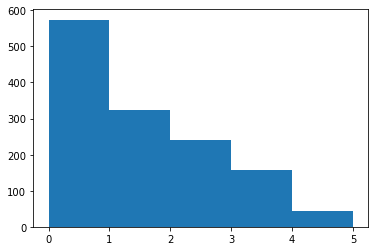

Charges
Minimun: 1121.8739 
Maximum: 63770.42801 
Mean: 13270.422265141257 
Median: 9382.033 



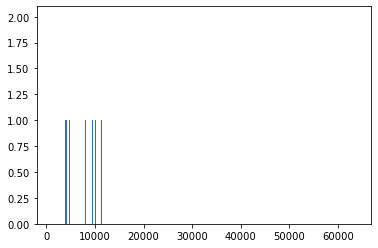

In [131]:
# Age
print("Age")
age_inspection = inspection(insurance['Age'])

# BMI
print("BMI")
bmi_inspection = inspection(insurance['BMI'])

# Children
print("Children")
child_inspection = inspection(insurance['Children'])

# Charges
print("Charges")
charges_inspection = inspection(insurance['Charges'])


In [135]:
def scat(val, out):
    sns.scatterplot(x=val, y=out)
    plt.show()

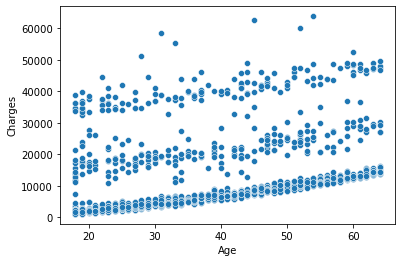

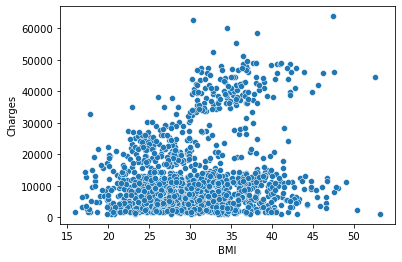

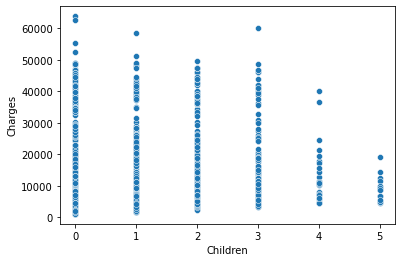

In [136]:
age_scatter = scat(insurance.Age, insurance.Charges)

bmi_scatter = scat(insurance.BMI, insurance.Charges)

child_scatter = scat(insurance.Children, insurance.Charges)

In [85]:
# Categorical variables. In this case we only have gender and smoker status = binary variables. 
# We can use crosstabs to see how these factors influence the insurance charges. 
# Function cat_inspect takes the cat (categorical variable) and out (the outcome).

def cat_inspect(cat, out):
    xtab = pd.crosstab(out, cat)
    per_xtab = xtab/len(cat)
    print(per_xtab) 

def plot_cat(cat, out):
    sns.boxplot(x=cat, y=out)
    plt.show()

Gender         female      male
Charges                        
1121.87390   0.000000  0.000747
1131.50660   0.000000  0.000747
1135.94070   0.000000  0.000747
1136.39940   0.000000  0.000747
1137.01100   0.000000  0.000747
...               ...       ...
55135.40209  0.000747  0.000000
58571.07448  0.000747  0.000000
60021.39897  0.000000  0.000747
62592.87309  0.000000  0.000747
63770.42801  0.000747  0.000000

[1337 rows x 2 columns]


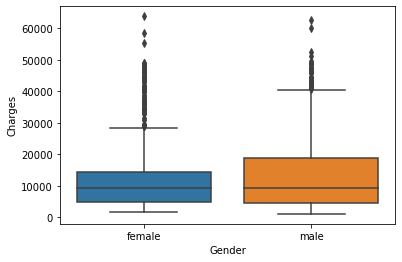

In [114]:
# Gender
gender_inspect = cat_inspect(insurance['Gender'], insurance['Charges'])

gender_plot = plot_cat(insurance.Gender, insurance.Charges)

In [99]:
# Inspect gender cat per gender ==> create new df
# Females
female = insurance[insurance.Gender == 'female']
print(female.head())

#female_inspect
print("Age")
age_inspection = inspection(female['Age'])

# BMI
print("BMI")
bmi_inspection = inspection(female['BMI'])

# Children
print("Children")
child_inspection = inspection(female['Children'])

# Charges
print("Charges")
charges_inspection = inspection(female['Charges'])


   Age  Gender    BMI  Children Smoker     Region      Charges
0   19  female  27.90         0    yes  southwest  16884.92400
5   31  female  25.74         0     no  southeast   3756.62160
6   46  female  33.44         1     no  southeast   8240.58960
7   37  female  27.74         3     no  northwest   7281.50560
9   60  female  25.84         0     no  northwest  28923.13692
Age
Minimun: 18 
Maximum: 64 
Mean: 39.503021148036254 
Median: 40.0 

BMI
Minimun: 16.815 
Maximum: 48.07 
Mean: 30.377749244713023 
Median: 30.1075 

Children
Minimun: 0 
Maximum: 5 
Mean: 1.0740181268882176 
Median: 1.0 

Charges
Minimun: 1607.5101 
Maximum: 63770.42801 
Mean: 12569.57884383534 
Median: 9412.9625 



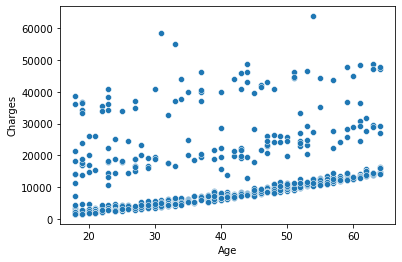

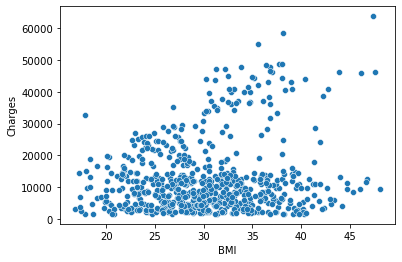

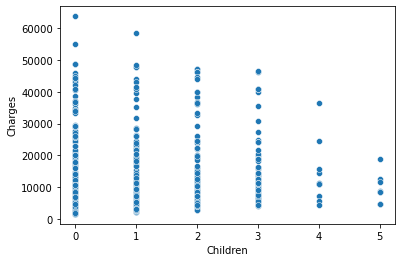

In [139]:
fem_age_scat = scat(female.Age, female.Charges)
fem_bmi_scat = scat(female.BMI, female.Charges)
fem_child_scat = scat(female.Children, female.Charges)

In [100]:
# Males
male = insurance[insurance.Gender == 'male']
print(male.head())

#female_inspect
print("Age")
age_inspection = inspection(male['Age'])

# BMI
print("BMI")
bmi_inspection = inspection(male['BMI'])

# Children
print("Children")
child_inspection = inspection(male['Children'])

# Charges
print("Charges")
charges_inspection = inspection(male['Charges'])

   Age Gender     BMI  Children Smoker     Region      Charges
1   18   male  33.770         1     no  southeast   1725.55230
2   28   male  33.000         3     no  southeast   4449.46200
3   33   male  22.705         0     no  northwest  21984.47061
4   32   male  28.880         0     no  northwest   3866.85520
8   37   male  29.830         2     no  northeast   6406.41070
Age
Minimun: 18 
Maximum: 64 
Mean: 38.917159763313606 
Median: 39.0 

BMI
Minimun: 15.96 
Maximum: 53.13 
Mean: 30.943128698224832 
Median: 30.6875 

Children
Minimun: 0 
Maximum: 5 
Mean: 1.1153846153846154 
Median: 1.0 

Charges
Minimun: 1121.8739 
Maximum: 62592.87309 
Mean: 13956.751177721886 
Median: 9369.61575 



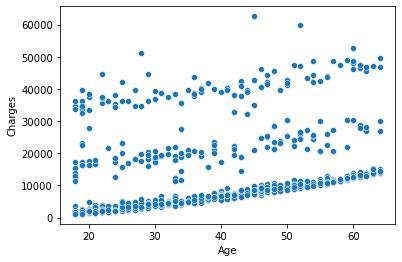

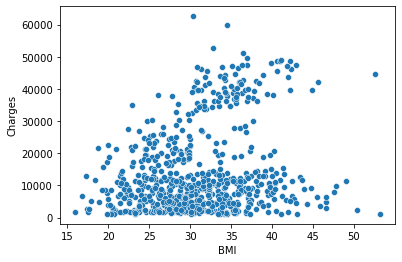

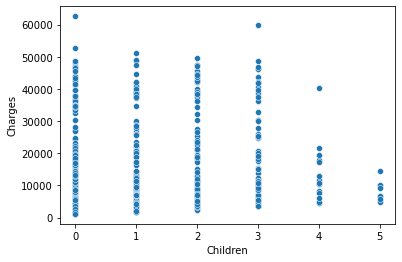

In [138]:
m_age_scat = scat(male.Age, male.Charges)
m_bmi_scat = scat(male.BMI, male.Charges)
m_child_scat = scat(male.Children, male.Charges)

Smoker             no       yes
Charges                        
1121.87390   0.000747  0.000000
1131.50660   0.000747  0.000000
1135.94070   0.000747  0.000000
1136.39940   0.000747  0.000000
1137.01100   0.000747  0.000000
...               ...       ...
55135.40209  0.000000  0.000747
58571.07448  0.000000  0.000747
60021.39897  0.000000  0.000747
62592.87309  0.000000  0.000747
63770.42801  0.000000  0.000747

[1337 rows x 2 columns]


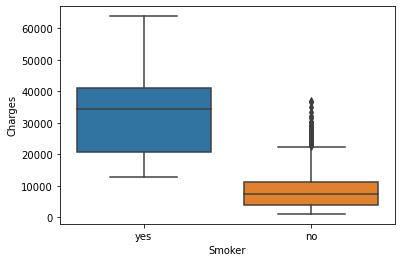

In [113]:
# Smoker
smoker_inspect = cat_inspect(insurance['Smoker'], insurance['Charges'])

smoker_plot = plot_cat(insurance.Smoker, insurance.Charges)

In [142]:
smoke_gender = cat_inspect(insurance.Smoker, insurance.Gender)

Smoker        no       yes
Gender                    
female  0.408819  0.085949
male    0.386398  0.118834


In [ ]:
Although there seems to be some correlation between age and charges and bmi and charges
smoking seems to have a greater influence on insurance charges.
Time to explore the data for smokers.

Age
Minimun: 18 
Maximum: 64 
Mean: 38.51459854014598 
Median: 38.0 



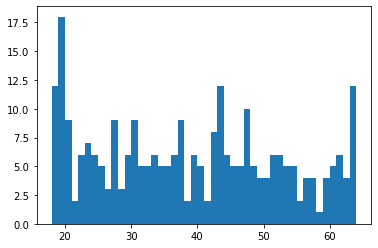

BMI
Minimun: 17.195 
Maximum: 52.58 
Mean: 30.708448905109503 
Median: 30.447499999999998 



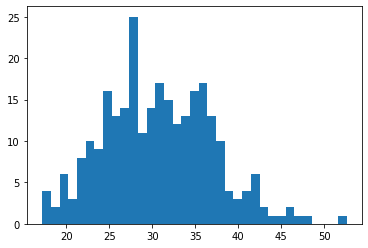

Children
Minimun: 0 
Maximum: 5 
Mean: 1.1131386861313868 
Median: 1.0 



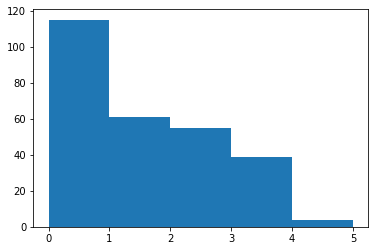

Charges
Minimun: 12829.4551 
Maximum: 63770.42801 
Mean: 32050.23183153285 
Median: 34456.348450000005 



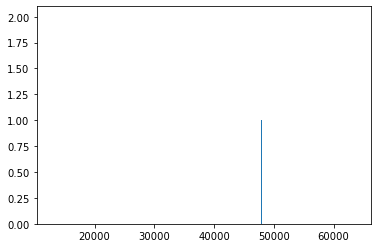

In [140]:
smoker = insurance[insurance.Smoker == 'yes']

print("Age")
age_inspection = inspection(smoker['Age'])

# BMI
print("BMI")
bmi_inspection = inspection(smoker['BMI'])

# Children
print("Children")
child_inspection = inspection(smoker['Children'])

# Charges
print("Charges")
charges_inspection = inspection(smoker['Charges'])

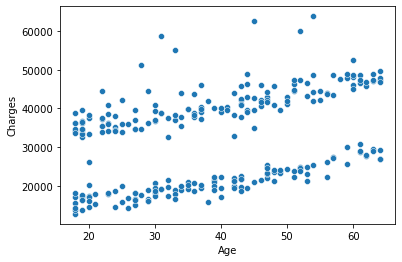

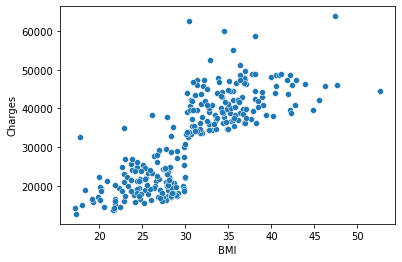

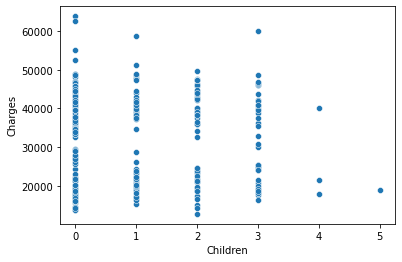

In [141]:
smoke_age_scat = scat(smoker.Age, smoker.Charges)
smoke_bmi_scat = scat(smoker.BMI, smoker.Charges)
smoke_child_scat = scat(smoker.Children, smoker.Charges)

In [ ]:
The scatterplots for the smokers shows some correlation between BMI and charges.
For now we can conclude that smoking and BMI (and age) show correlation with higher
insurance costs. Further analysis is required how much impact each of the factors
have on the insurance costs. 
Prevention should be directed at quitting smoking and weight loss. 

* It should be noted that smoking causes several adverse health effects, which 
in turn could increase insurance costs. 
https://www.cdc.gov/tobacco/basic_information/health_effects/index.htm